In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from matplotlib import pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv('col_names_trans_data(Sheet1)id.csv')
df.fillna(0, inplace=True)
df = df.drop(['ID'], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,Eubacterium,Oscillibacter,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,Health,Bacteroides,Paraprevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,Bipolar Disorder,Odoribacter,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,Bipolar Disorder,Bacteroides,Prevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
park = df[df.iloc[:, 0] == 'Parkinsons']
park = park.iloc[:, 1:]
park

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
164,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
165,Alistipes,Bacteroides,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,Oscillospira,...,0,0,0,0,0,0,0,0,0,0
166,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
167,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Lachnospira,Oscillospira,...,0,0,0,0,0,0,0,0,0,0
168,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
234,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
235,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0
236,Alistipes,Bacteroides,Blautia,Clostridium,Dorea,Faecalibacterium,Parabacteroides,Ruminococcus,Coprococcus,Lachnospira,...,0,0,0,0,0,0,0,0,0,0


In [4]:
park_list = park.values.tolist()
park_list_transp = park.apply(lambda row: row.tolist(), axis=1)
park_list_transp.head()

164    [Alistipes, Bacteroides, Blautia, Clostridium,...
165    [Alistipes, Bacteroides, Clostridium, Dorea, F...
166    [Alistipes, Bacteroides, Blautia, Clostridium,...
167    [Alistipes, Bacteroides, Blautia, Clostridium,...
168    [Alistipes, Bacteroides, Blautia, Clostridium,...
dtype: object

In [5]:
items = set()
for col in park:
    items.update(park[col].unique())
print(items)

{0, 'Lachnospira', 'Blautia', 'Bacteroides', 'Dorea', 'Ruminococcus', 'Subdoligranulum', 'Sutterella', 'Anaerostipes', 'Oscillospira', 'Clostridium', 'Parabacteroides', 'Coprococcus', 'Faecalibacterium', 'Alistipes'}


In [6]:
itemset = set(items)
encoded_vals = []
for index, row in park.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df


,Sutterella,Anaerostipes,Lachnospira,Blautia,Dorea,Bacteroides,Alistipes,Ruminococcus,Subdoligranulum,Oscillospira,Clostridium,Parabacteroides,Faecalibacterium,Coprococcus
0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,1,1,1,0
4,1,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,0,1,1,1,1,1,1,1,1,1,1,1,1
70,1,1,1,1,1,1,1,1,1,1,1,1,1,1
71,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72,0,0,1,1,1,1,1,1,1,1,1,1,1,1


In [28]:
ohe_df = ohe_df.astype(bool)
ohe_df.dtypes

Sutterella          bool
Anaerostipes        bool
Lachnospira         bool
Blautia             bool
Dorea               bool
Bacteroides         bool
Alistipes           bool
Ruminococcus        bool
Subdoligranulum     bool
Oscillospira        bool
Clostridium         bool
Parabacteroides     bool
Faecalibacterium    bool
Coprococcus         bool
dtype: object

In [111]:
freq_items = apriori(ohe_df, min_support=1, use_colnames=True, verbose=1, max_len=3)
#freq_items

Processing 3 combinations | Sampling itemset size 3


In [112]:
conf_rules = association_rules(freq_items, metric="confidence", min_threshold=1)

len(conf_rules)

12

In [80]:
sup_rules = association_rules(freq_items, metric='support', min_threshold=0.97)
len(sup_rules)

60

In [40]:
lift_rules = association_rules(freq_items, metric='lift', min_threshold=1)
len(lift_rules)

60

In [61]:
conf_sorted_rules = conf_rules.sort_values(by="confidence", ascending=False)
conf_sorted_rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Blautia),(Bacteroides),0.972973,1.0,0.972973,1.0,1.0,0.0,inf,0.0
1,(Blautia),(Ruminococcus),0.972973,1.0,0.972973,1.0,1.0,0.0,inf,0.0
20,(Blautia),"(Oscillospira, Ruminococcus)",0.972973,1.0,0.972973,1.0,1.0,0.0,inf,0.0
21,"(Oscillospira, Ruminococcus)",(Bacteroides),1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
22,"(Oscillospira, Bacteroides)",(Ruminococcus),1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
23,"(Ruminococcus, Bacteroides)",(Oscillospira),1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
24,(Oscillospira),"(Ruminococcus, Bacteroides)",1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
25,(Ruminococcus),"(Oscillospira, Bacteroides)",1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
26,(Bacteroides),"(Oscillospira, Ruminococcus)",1.000000,1.0,1.000000,1.0,1.0,0.0,inf,0.0
27,"(Ruminococcus, Parabacteroides)",(Bacteroides),0.972973,1.0,0.972973,1.0,1.0,0.0,inf,0.0


In [78]:
sup_sorted_rules = sup_rules.sort_values(by="support", ascending=False)
sup_sorted_rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Bacteroides),(Oscillospira),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
36,"(Oscillospira, Ruminococcus)",(Bacteroides),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
37,"(Oscillospira, Bacteroides)",(Ruminococcus),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
38,"(Ruminococcus, Bacteroides)",(Oscillospira),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
6,(Ruminococcus),(Bacteroides),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
7,(Bacteroides),(Ruminococcus),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
8,(Oscillospira),(Bacteroides),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
39,(Oscillospira),"(Ruminococcus, Bacteroides)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
40,(Ruminococcus),"(Oscillospira, Bacteroides)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
12,(Oscillospira),(Ruminococcus),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0


In [81]:
lift_sorted_rules = lift_rules.sort_values(by="lift", ascending=False)
lift_sorted_rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Blautia),(Bacteroides),0.972973,1.000000,0.972973,1.000000,1.0,0.0,inf,0.0
1,(Bacteroides),(Blautia),1.000000,0.972973,0.972973,0.972973,1.0,0.0,1.0,0.0
32,"(Ruminococcus, Blautia)",(Oscillospira),0.972973,1.000000,0.972973,1.000000,1.0,0.0,inf,0.0
33,(Oscillospira),"(Ruminococcus, Blautia)",1.000000,0.972973,0.972973,0.972973,1.0,0.0,1.0,0.0
34,(Ruminococcus),"(Oscillospira, Blautia)",1.000000,0.972973,0.972973,0.972973,1.0,0.0,1.0,0.0
35,(Blautia),"(Oscillospira, Ruminococcus)",0.972973,1.000000,0.972973,1.000000,1.0,0.0,inf,0.0
36,"(Oscillospira, Ruminococcus)",(Bacteroides),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
37,"(Oscillospira, Bacteroides)",(Ruminococcus),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
38,"(Ruminococcus, Bacteroides)",(Oscillospira),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
39,(Oscillospira),"(Ruminococcus, Bacteroides)",1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0


In [110]:
# doing this because plotly cannot serialize frozensets 
conf_rules["antecedents"] = conf_rules["antecedents"].apply(lambda x: ", ".join(sorted(x)))
conf_rules["consequents"] = conf_rules["consequents"].apply(lambda x: ", ".join(sorted(x)))

fig = px.scatter(conf_rules, 
                 x="support", 
                 y="confidence", 
                 size="lift", 
                 color="lift",
                 hover_data=["antecedents", "consequents"],
                 title="Support vs Confidence")

fig.write_html("supvsconf.html")
fig.show()


In [115]:

# Create a directed graph
G = nx.DiGraph()

# Add edges
for _, row in conf_rules.iterrows():
    G.add_edge(", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["confidence"])

# Get positions
pos = nx.spring_layout(G, k=0.5)

# Create edge traces
edge_x, edge_y = [], []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=1, color='#888'),
                         hoverinfo='none', mode='lines')

# Create node traces
node_x, node_y, text = [], [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', 
                        marker=dict(size=10, color='lightblue'),
                        text=text, hoverinfo="text")

# Create figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(showlegend=False, title="Association Rule Network Graph")
fig.write_image("networkgraph.jpg")
fig.show()


/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_3458/1292819354.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




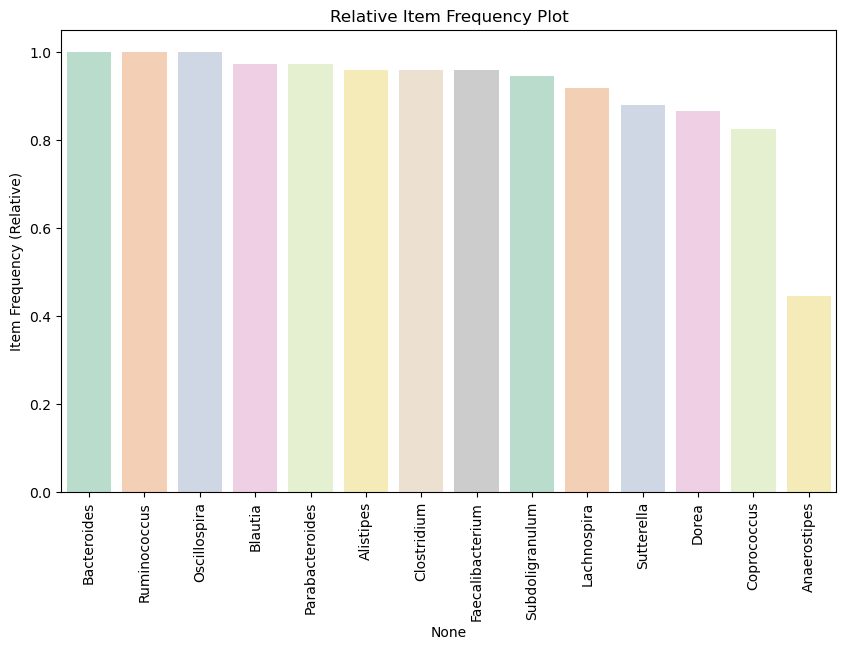

In [24]:
item_frequencies = ohe_df.sum(axis=0) / len(ohe_df)  # relative frequencies
item_frequencies_sorted = item_frequencies.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_frequencies_sorted.index, y=item_frequencies_sorted.values, palette="Pastel2")
plt.title("Relative Item Frequency Plot")
plt.ylabel("Item Frequency (Relative)")
plt.xticks(rotation=90)
plt.show()